# Assignment 4 Build Models using Linear Regression

## Learning Objectives

* Identify linear regression algorithm
* Identify how linear regression can be used when working with data
* Apply linear regression to build data models
* Evaluate and communicate analysis results by applying linear regression to learn from data

## Overview

In this assignment, you will examine how to use regressions to analyze data.  In particular, you will approach several problems using a data set that represents bluegill data instances randomly sampled from Lake Mary in Minnesota.  The researchers (Cook and Weisberg, 1999) measured and recorded the data in the file (fish.txt).  You will use regression analysis to build models to conduct predictions. You are required to use **polyfit** and **polyval** in numpy library as we learned in the lectures. **If you use any other libries, your solutions will not get any points.**  

For this assignment, you will need to include markup and code cells in your notebook so that you can address questions based on the plots generated from the different problems. In your submitted document, you need to include the created visualization plots by running your code in the notebook. Even if your code cells cannot be executed, you stil need to run your code, including the output in the notebook, and you can include an explanation of what you think should have happened. Make sure you answer the questions in full sentences.


## Problem 1

You should plot the data in the data file (fish.txt). Your plot should plot y, length (in mm) of the fish, versus x, age (in years) of the fish, as markers.  Note that the age values in the given file are not sorted.  Thus, you shoud not connect the dots based on the order they appear in the data file directly.


Text(0, 0.5, 'Length')

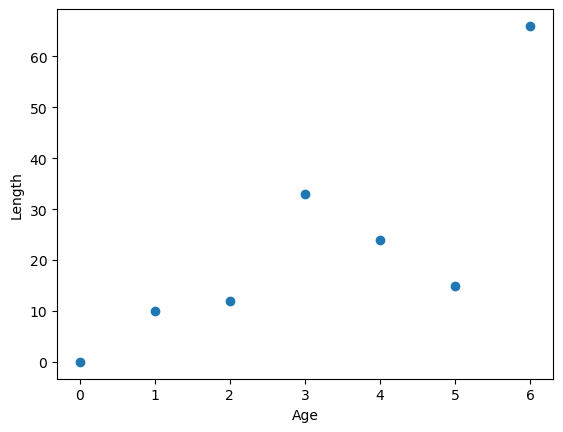

In [7]:
#Pay attention to the age data in fish.txt
import matplotlib.pyplot as plt
%matplotlib inline

xValues, yValues = [5, 0, 1, 2, 6, 3, 4], [15, 0, 10, 12,66, 33, 24]
plt.plot(xValues, yValues, marker='o', linestyle='none')
plt.xlabel('Age')
plt.ylabel('Length')

## Problem 2

You need to address the question:

* How is the length of a bluegill fish (dependent variable) related to its age (independent variable)?

Given the data points you have, you need to build three models:
* a line model,
* a perabela model,
* and a cubic model

using the **polyfit** function in the numpy library. When making predications using a model resulted by polyfit, you are required to use **polyval**. For each of the three regression models you build, you need to compute the **R-squared** value for the model and plot the data along with the fit curve.

For the plots, you should plot data points (x,y) as **blue** dots and your fit curves (aka models) as colorful lines in a figure. You should also label the plot axes appropriately and have a title and legends reporting information of your regression models and R-square values evaluated on the given data points.

In [17]:

fish_data_text = """age	length
1	67
1	62
2	109
2	83
2	91
2	88
3	137
3	131
3	122
3	122
3	118
3	115
3	131
3	143
3	142
2	123
3	122
4	138
4	135
4	146
4	146
4	145
4	145
4	144
4	140
4	150
4	152
4	157
4	155
4	153
4	154
4	158
4	162
4	161
4	162
4	165
4	171
5	171
4	162
4	169
4	167
5	188
2	100
2	109
4	150
3	140
4	170
3	150
4	140
4	140
4	150
4	150
3	140
3	150
3	150
4	150
4	160
3	140
4	150
5	170
4	150
5	150
4	150
4	150
3	150
5	150
5	160
4	140
5	160
3	130
4	160
3	130
4	170
6	170
4	160
5	180
4	160
4	170
"""

with open("fish.txt", "w") as f:
    f.write(fish_data_text)

print("fish.txt created")

    

fish.txt created


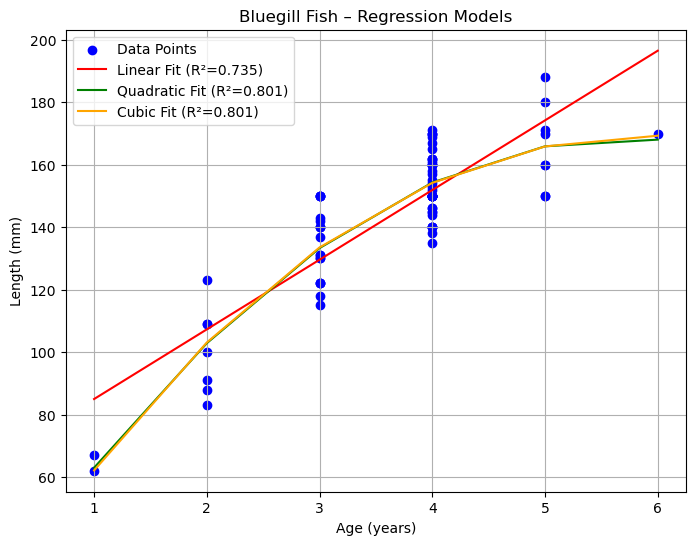

Linear model coefficients: [22.31229429 62.64898354]
R² (Linear)   = 0.7349
Quadratic model coefficients: [-4.71866479 54.04931191 13.62237616]
R² (Quadratic)= 0.8011
Cubic model coefficients: [ 0.12788743 -6.03576241 58.19360452  9.81008692]
R² (Cubic)    = 0.8012


In [11]:
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('fish.txt', skiprows=1)

x = data[:, 0]
y = data[:, 1]

idx = np.argsort(x)
x_sorted = x[idx]
y_sorted = y[idx]

def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot

coef_linear = np.polyfit(x, y, 1)
y_linear = np.polyval(coef_linear, x)
r2_linear = r_squared(y, y_linear)

coef_quad = np.polyfit(x, y, 2)
y_quad = np.polyval(coef_quad, x)
r2_quad = r_squared(y, y_quad)

coef_cubic = np.polyfit(x, y, 3)
y_cubic = np.polyval(coef_cubic, x)
r2_cubic = r_squared(y, y_cubic)

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data Points')

plt.plot(x_sorted, np.polyval(coef_linear, x_sorted),
         color='red', label=f'Linear Fit (R²={r2_linear:.3f})')
plt.plot(x_sorted, np.polyval(coef_quad, x_sorted),
         color='green', label=f'Quadratic Fit (R²={r2_quad:.3f})')
plt.plot(x_sorted, np.polyval(coef_cubic, x_sorted),
         color='orange', label=f'Cubic Fit (R²={r2_cubic:.3f})')

plt.xlabel('Age (years)')
plt.ylabel('Length (mm)')
plt.title('Bluegill Fish – Regression Models')
plt.legend()
plt.grid(True)
plt.show()

print("Linear model coefficients:", coef_linear)
print(f"R² (Linear)   = {r2_linear:.4f}")
print("Quadratic model coefficients:", coef_quad)
print(f"R² (Quadratic)= {r2_quad:.4f}")
print("Cubic model coefficients:", coef_cubic)
print(f"R² (Cubic)    = {r2_cubic:.4f}")


## Problem 3

You need to address the question:

* What is the length of a randomly selected five-year-old bluegill fish?

Note that this question should be addressed based on a chosen model, which could be any one of the three models you built in problem 2's solution. You should use the model to make a prediction on the length based on the age. You need to include code you used to come up the answer when addressing this question.  Hint: You could use **polyval** and the chosen model to address the question.  

Predicted length of a 5-year-old bluegill fish: 165.90 mm


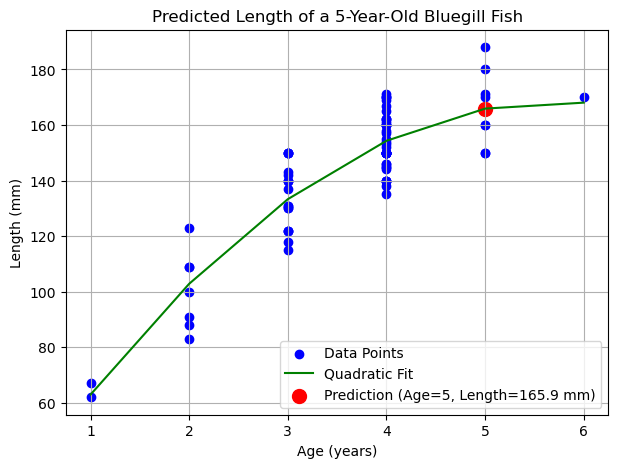

In [12]:
# Predict the length of a 5-year-old fish using the quadratic model
age_to_predict = 5
predicted_length = np.polyval(coef_quad, age_to_predict)

print(f"Predicted length of a 5-year-old bluegill fish: {predicted_length:.2f} mm")

# Plot the prediction point on the quadratic curve
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_sorted, np.polyval(coef_quad, x_sorted), color='green', label='Quadratic Fit')
plt.scatter(age_to_predict, predicted_length, color='red', s=100, label=f'Prediction (Age={age_to_predict}, Length={predicted_length:.1f} mm)')
plt.xlabel('Age (years)')
plt.ylabel('Length (mm)')
plt.title('Predicted Length of a 5-Year-Old Bluegill Fish')
plt.legend()
plt.grid(True)
plt.show()


## Problem 4

You need to address the question:
* How is the length of a bluegill fish (dependent variable) related to its age (independent variable)?

For this problem, you are required to apply **cross validation** to build, evaluate, and decide the a model that fits the data points.  For the regression model you choose, you need to compute the R-squared value(s) to support your model choice.

For the plot, you should plot data points (x,y) as **blue** dots and your best fit curve (aka model) as a **red solid** line. You should also label the axes of this figure appropriately and have a title reporting information including degree of your regression model and R-square values of your model evaluated on the given data points.



Average Cross-Validation R² (Linear):   0.4931
Average Cross-Validation R² (Quadratic): 0.7546
Average Cross-Validation R² (Cubic):     0.7297

Best model based on cross-validation: Degree 2


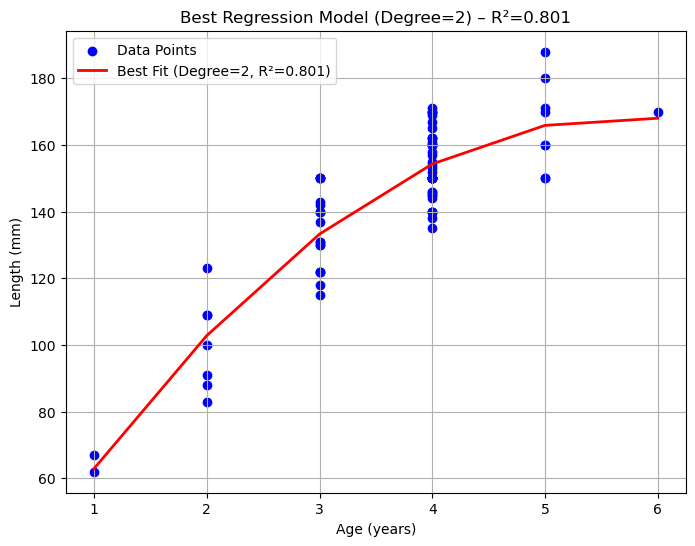

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.genfromtxt('fish.txt', skip_header=1)

x = data[:, 0]
y = data[:, 1]

# Sort for plotting
idx = np.argsort(x)
x_sorted = x[idx]
y_sorted = y[idx]

# Helper function for R-squared
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# Manual k-fold cross-validation
def cross_validate_polyfit(x, y, degree, k=5):
    n = len(x)
    indices = np.arange(n)
    np.random.shuffle(indices)
    folds = np.array_split(indices, k)
    
    r2_scores = []
    for i in range(k):
        test_idx = folds[i]
        train_idx = np.setdiff1d(indices, test_idx)
        
        # Train model
        coef = np.polyfit(x[train_idx], y[train_idx], degree)
        
        # Predict on test set
        y_pred = np.polyval(coef, x[test_idx])
        
        # Evaluate
        r2 = r_squared(y[test_idx], y_pred)
        r2_scores.append(r2)
        
    return np.mean(r2_scores)

# Compute average R² for each model
r2_linear_cv = cross_validate_polyfit(x, y, 1)
r2_quad_cv   = cross_validate_polyfit(x, y, 2)
r2_cubic_cv  = cross_validate_polyfit(x, y, 3)

print(f"Average Cross-Validation R² (Linear):   {r2_linear_cv:.4f}")
print(f"Average Cross-Validation R² (Quadratic): {r2_quad_cv:.4f}")
print(f"Average Cross-Validation R² (Cubic):     {r2_cubic_cv:.4f}")

# Select best model based on highest R²
best_degree = np.argmax([r2_linear_cv, r2_quad_cv, r2_cubic_cv]) + 1
print(f"\nBest model based on cross-validation: Degree {best_degree}")

# Fit final model using all data
best_coef = np.polyfit(x, y, best_degree)
y_best_fit = np.polyval(best_coef, x_sorted)
r2_final = r_squared(y, np.polyval(best_coef, x))

# Plot data and best-fit curve
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_sorted, y_best_fit, color='red', linewidth=2,
         label=f'Best Fit (Degree={best_degree}, R²={r2_final:.3f})')
plt.xlabel('Age (years)')
plt.ylabel('Length (mm)')
plt.title(f'Best Regression Model (Degree={best_degree}) – R²={r2_final:.3f}')
plt.legend()
plt.grid(True)
plt.show()


## Problem 5
First, you need to address the question:

* How is the length of a bluegill fish (dependent variable) related to its age (independent variable)?

For this problem, you are still required to apply **cross validation** to build, evaluate, and decide the a model that fits the data points.  To evaluate your models, however, you need to compute the **Root Mean Square Error(RMSE)**, which computation is given below.

RMSE provides a way to measure the error of a model in predicting quantitative data.

Secondly, you need to address the below questions:

* What is the choice of the model based on your evaluation using RMSE? Is it same or different from the model you chose in Problem 4? And how do you think about the chosen model(s) based on your evaluations?

The below code cell provides a definition of RMSE in Python. You can just apply it in your code.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load and sort data
data = np.loadtxt('fish.txt')
x = data[:, 0]
y = data[:, 1]
idx = np.argsort(x)
x_sorted = x[idx]
y_sorted = y[idx]


def rmse(y, estimated):
    """
    Calculate the root mean square error term.
    """
    return np.sqrt(sum((y - estimated) ** 2) / len(y))

def cross_validate_rmse(x, y, degree, k=5):
    n = len(x)
    indices = np.arange(n)
    np.random.shuffle(indices)
    folds = np.array_split(indices, k)
    rmse_scores = []

    for i in range(k):
        test_idx = folds[i]
        train_idx = np.setdiff1d(indices, test_idx)

        # Train model
        coef = np.polyfit(x[train_idx], y[train_idx], degree)

        # Predict on test set
        y_pred = np.polyval(coef, x[test_idx])

        # Evaluate using RMSE
        score = rmse(y[test_idx], y_pred)
        rmse_scores.append(score)

    return np.mean(rmse_scores)

rmse_linear_cv = cross_validate_rmse(x, y, 1)
rmse_quad_cv   = cross_validate_rmse(x, y, 2)
rmse_cubic_cv  = cross_validate_rmse(x, y, 3)

print(f"Average Cross-Validation RMSE (Linear):   {rmse_linear_cv:.4f}")
print(f"Average Cross-Validation RMSE (Quadratic): {rmse_quad_cv:.4f}")
print(f"Average Cross-Validation RMSE (Cubic):     {rmse_cubic_cv:.4f}")

rmse_values = [rmse_linear_cv, rmse_quad_cv, rmse_cubic_cv]
best_degree = np.argmin(rmse_values) + 1
print(f"\nBest model based on RMSE cross-validation: Degree {best_degree}")

# Fit the best model on full dataset
best_coef = np.polyfit(x, y, best_degree)
y_best = np.polyval(best_coef, x_sorted)
rmse_final = rmse(y, np.polyval(best_coef, x))


plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_sorted, y_best, color='red', linewidth=2,
         label=f'Best Fit (Degree={best_degree}, RMSE={rmse_final:.3f})')
plt.xlabel('Age (years)')
plt.ylabel('Length (mm)')
plt.title(f'Bluegill Fish – Best Model (Degree={best_degree}) Using RMSE')
plt.legend()
plt.grid(True)
plt.show()




ValueError: could not convert string 'age' to float64 at row 0, column 1.

## Problem 6 Reflection

After you finish approaching the above problems, you need to reflect on the learning process.  Below are the questions you need to address in your reflection.  
* What strategies did you use to solve the problems?
* What were the most challenging aspects of this assignment? How did you overcome these challenges? If you couldn’t fully overcome them, what steps did you take to try?
* What are the key takeaways or lessons you learned from this assignment? How do you think the skills and concepts in this assignment might apply to real-world siutations or future projects?

# Turn-in
You need to turn in at least two files for your submission:

* Your notebook file that contains the code and presentation. You need to run all your cells and present the results in the notebook document.
* The data file you used to build models.
* Any other supplementary documents you want to submit to D2L Assignments folder

You need to package the files into a zip archive and upload the zip file to D2L assignment folder <b>Assignment 4</b>



### Reflection

**What strategies did you use to solve the problems?**  
To solve the problems, I broke each step down into smaller parts and made sure I understood what each function was doing before running the full code. I used `numpy.polyfit` to create regression models and `numpy.polyval` to make predictions, as required. For model evaluation, I calculated both R² and RMSE to see which models performed best. I also used cross-validation to make the comparisons fair and reliable. Plotting the results helped me visually confirm that the models made sense based on the data pattern.

**What were the most challenging aspects of this assignment? How did you overcome these challenges?**  
The most challenging part was implementing cross-validation and understanding how to use it without external libraries like scikit-learn. At first, it was confusing how to split the data manually, but I overcame this by creating a simple loop with NumPy’s array functions. It took some trial and error to make sure each fold was evaluated correctly. Another challenge was interpreting the differences between R² and RMSE, so I reviewed class notes and examples to better understand what each metric tells us about model performance.

**What are the key takeaways or lessons you learned from this assignment? How do you think the skills and concepts in this assignment might apply to real-world situations or future projects?**  
This assignment taught me how to build and evaluate regression models from scratch using only NumPy, which helped me understand what’s happening behind the scenes in machine learning libraries. I also learned how to interpret model performance metrics and how cross-validation improves model reliability. In real-world situations, these skills are useful for data analysis tasks such as predicting sales, estimating growth, or modeling biological or environmental patterns. I now feel more confident analyzing data, testing model accuracy, and communicating which model best fits a given dataset.
